# 1. Introduction

Describe the approach chosen, reason for choosing it and how you implemented it.

The approach I used as the first one (Controlled Environment). The reason I chose this approach was because I believed that the lack of photos that I trained the model on in lab 2 was the biggest drawback for the camera to detect my finger count. In order to fix this, approach one allows us to train with more data for a better result in our controlled environment. I implemented this by gathering a much large amount of training and validation data using the lab2 gui camera app. Using this, I then trained a new cnn_learner model using the same augmentations for better results. 


# 2. Model training and Results
Any code to train a model and produce results or a reference to the notebook/code file.

In [1]:
!pip install -q fastai==2.2.5
!pip install -q fastbook

import fastbook
fastbook.setup_book()

import fastai
print(fastai.__version__)

from fastai.vision.all import *

     |████████████████████████████████| 191 kB 8.7 MB/s 
     |████████████████████████████████| 776.8 MB 17 kB/s 
     |████████████████████████████████| 55 kB 4.4 MB/s 
     |████████████████████████████████| 12.8 MB 42.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.7.1 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.7.1 which is incompatible.
     |████████████████████████████████| 720 kB 8.9 MB/s 
     |████████████████████████████████| 188 kB 61.7 MB/s 
     |████████████████████████████████| 1.2 MB 52.2 MB/s 
Mounted at /content/gdrive
2.5.6


/content/gdrive/MyDrive/digits
Training batch


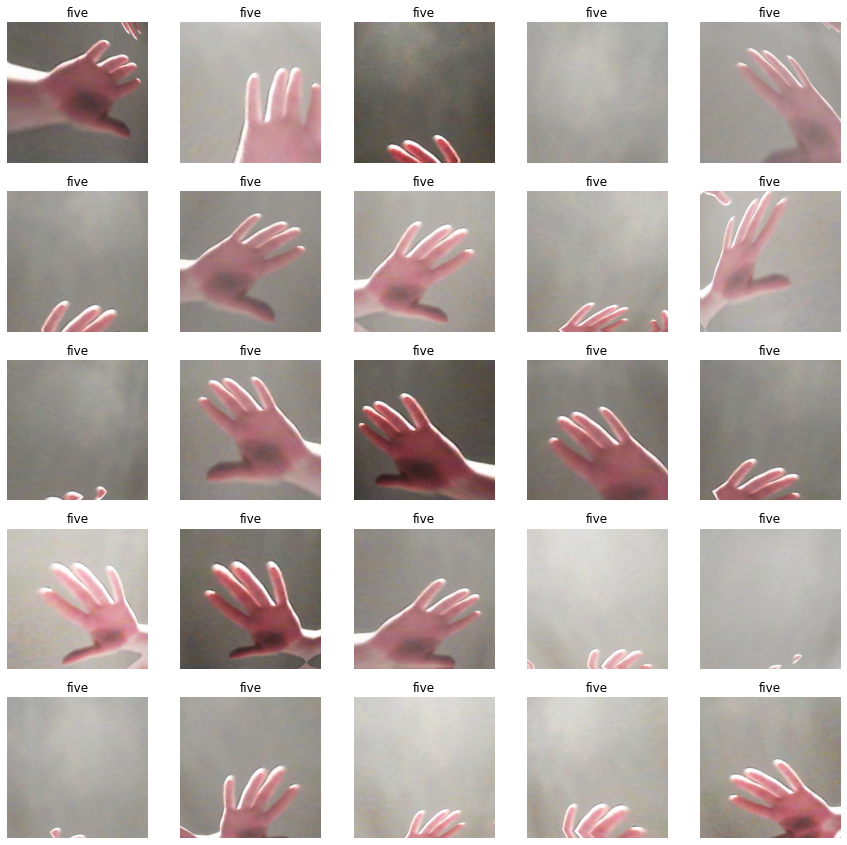

In [2]:
#lab2 gui was used to take photos for more training and validation data
path = Path('./gdrive/MyDrive/digits/')
print(path.absolute())

set_seed(42, True)
fingers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #image->discrete category
    get_items=get_image_files, # path->images
    splitter=RandomSplitter(valid_pct=0.2, seed=42), #how to train-valid split
    get_y=parent_label, # get the label from the directory name
    item_tfms=Resize(640),
    batch_tfms=aug_transforms(mult = 2.0, do_flip = True, max_rotate= 10.0,
                              min_zoom = 1.0, max_zoom=1.1, max_lighting=0.2, size=420)) #a set of transformations like  rotation, flipping, perspective warping, brightness changes and contrast changes) # resize to 128x128

print('Training batch')
dls = fingers.dataloaders(path, batch_size=32)
dls.train.show_batch(max_n=25, nrows=5, unique=True) 

Validation batch


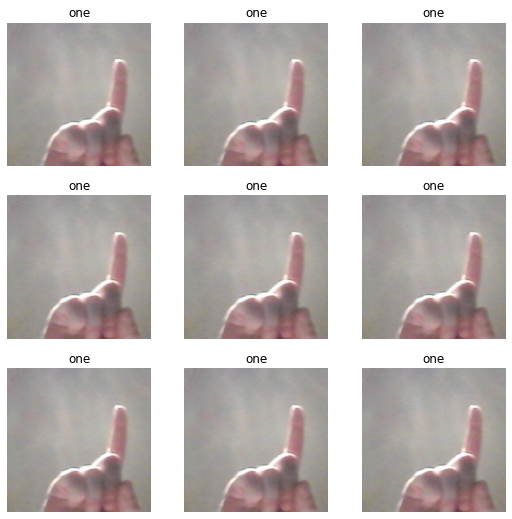

In [3]:
print('Validation batch')
dls.valid.show_batch(unique=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

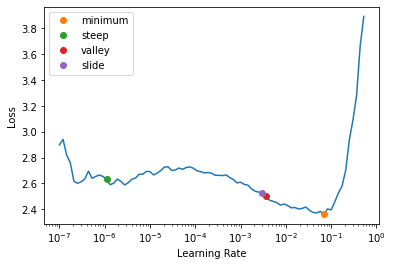

In [4]:
set_seed(42, True)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
lr_min, lr_steep, lr_valley, lr_slide = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [5]:
print(f"Minimum/10:\t{lr_min:.2e}\nSteepest point:\t{lr_steep:.2e}\nLongest valley:\t{lr_valley:.2e}\nSlide interval:\t{lr_slide:.2e}")

Minimum/10:	6.92e-03
Steepest point:	1.10e-06
Longest valley:	3.63e-03
Slide interval:	3.02e-03


In [7]:
set_seed(42, True)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(3e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.317335,0.317012,0.877922,00:28
1,1.079456,0.199160,0.929870,00:26
2,0.820123,0.144034,0.948052,00:25


epoch,train_loss,valid_loss,accuracy,time
0,0.796967,0.669573,0.898701,00:33
1,0.850682,4.549634,0.566234,00:33
2,1.101882,5.593060,0.350649,00:32
3,1.113226,0.835024,0.732468,00:32
4,0.951257,0.489077,0.831169,00:32
5,0.813072,0.305105,0.877922,00:32
6,0.688115,0.116658,0.953247,00:32
7,0.559794,0.053206,0.979221,00:32
8,0.460392,0.042544,0.984416,00:33
9,0.374406,0.021980,0.992208,00:32


In [9]:
learn.export("./gdrive/MyDrive/finger_count.pkl")

Finally: the exported model is then put against a set of new images (5 of each finger) and it must predict the output. Please see lab5_results.csv for the results and the confusion matrix is plotted below.



In [30]:
count = 0
numbers = ["one", "two", "three", "four", "five"]
for number in numbers:
  for image in range(5):
    number_zeros = 8 - len(str(count))
    filename = '0'*number_zeros + str(count) + ".jpg"
    print("The true number is:", number, "The model prediction is", learn.predict(r"./gdrive/MyDrive/test/"+filename)[0])
    count+=1

The true number is: one The model prediction is one


The true number is: one The model prediction is one


The true number is: one The model prediction is one


The true number is: one The model prediction is one


The true number is: one The model prediction is one


The true number is: two The model prediction is two


The true number is: two The model prediction is two


The true number is: two The model prediction is two


The true number is: two The model prediction is two


The true number is: two The model prediction is two


The true number is: three The model prediction is three


The true number is: three The model prediction is three


The true number is: three The model prediction is three


The true number is: three The model prediction is three


The true number is: three The model prediction is three


The true number is: four The model prediction is four


The true number is: four The model prediction is four


The true number is: four The model prediction is four


The true number is: four The model prediction is four


The true number is: four The model prediction is four


The true number is: five The model prediction is five


The true number is: five The model prediction is five


The true number is: five The model prediction is five


The true number is: five The model prediction is five


The true number is: five The model prediction is five


The accuracy is: 1.0


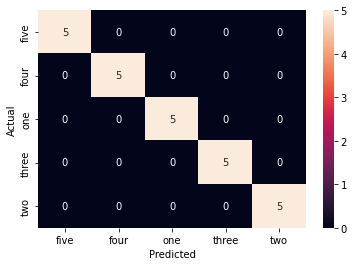

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score


with open('./gdrive/MyDrive/lab5-results.csv') as file:
    df = pd.read_csv(file)
    df_predict = df[['Actual','Prediction']]

conf_matrix = pd.crosstab(df['Actual'], df['Prediction'], rownames=['Actual'], colnames=['Predicted'], dropna=False)

c_matrix = confusion_matrix(df['Actual'], df['Prediction'])
accuracy = accuracy_score(df['Actual'], df['Prediction'])
print('The accuracy is:', accuracy) # Diagonal plus all so 14/25 = 0.56

sns.heatmap(conf_matrix, annot=True)
plt.show()

# 3. Summary and Conclusion
Summarize your new results and state your lab3 and lab4 results.


Conclusion: How large is the improvement in the performance of the classifier due to the approach chosen? Include your interpretation why it worked (or did not work).

# 4. Reflection
Include a sentence or two about
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating

while working on this assignment.

*YOUR ANSWER HERE*

